Chiara Repetti S4910545

# Cartoonize Album

## Project Goal

##### Goals: The main goals of this process are to produce two different cartoonize visual styles for album covers. The first style aims for an authentic cartoon look, achieved by minimizing signal variations through quantization and analyzing the histogram. The second style focuses on a painterly effect, specifically crafted for album covers with a pink theme. 


In order to achieve a cartoon-like effect in the image to achieve a more realistic cartoon-like effect, I have outlined two scenarios with distinct objectives.

Scenario 1: Quantization followed by Gaussian Filter

In this scenario I wanted to make the image more realistic and loyal to the original color. In order to do so I set some goal that will be used also in the second scenario
- Objective 1: Color Distribution Analysis: Utilize histograms to analyze color intensity distributions, exploring color spaces like RGB and HSV to gain insights into color distribution.
- Objective 2: Quantization Algorithm: Design and implement a quantization algorithm to group similar values and achieve a realistic cartoon effect.
- Objective 3: Smoothing and Uniformization: Implement a low-pass filter, such as the Gaussian filter, to achieve image smoothing and reduce high-frequency details.
- Objective 4: Edge Enhancement: Apply an edge detection operator to accentuate edges, providing the cartoon image with a defined appearance.
- Objective 5: Color Selection and Modification: Implement a feature for selecting and modifying specific colors in the cartoon image.


Scenario 2: Gaussian Filter followed by Quantization
In Scenario 2, the process begins with image smoothing using the Gaussian filter, followed by quantization. This approach might be preferable for achieving a more "painterly" and "flat" cartoon effect, which can later be adapted to become more "monochromatic pink" in subsequent stages.

#### Data: 
I opted for the JPEG format for my images, particularly for cover photos featuring striking contrasts, smooth tonal gradations, and intricate details, such as the facial features in portraits like Rihanna's. The efficient compression of JPEG allows me to maintain a good balance between image quality and file size, making it ideal for vibrant and visually rich content, such as creating a cartoon-like album cover.

### Methodologies:

To achieve a cartoon-like effect in the image, two scenarios with distinct goal sequences were devised:

Scenario 1: Gaussian Filter followed by Quantization
- Histogram Analysis and Color Spaces:
    - Explore color intensity distributions using histograms (RGB and HSV color spaces).
    - Library functions: Image histogram analysis functions.
- Quantization Algorithm:
    - Implement a quantization algorithm to group similar values post-Gaussian filter.
    - Library functions: Custom quantization algorithm.
- Smoothing and Uniformization:
    - Apply a Gaussian filter for image smoothing and reduce high-frequency details.
    - Use the smoothed image for specific area uniformization pre-quantization.
    - Library functions: Gaussian filter functions.
- Edge Enhancement Operation:
    - Apply custom edge detection (e.g., manual auto-detection with Sobel) post-quantization and smoothing.
    - Library functions: Sobel edge detection.
    - Apply an edge detection operator (e.g., Canny) post-quantization and smoothing.
    - Library functions: Canny edge detection.
- Color Selection and Modification:
    - Implement a feature for users to select and modify specific colors in the cartoon image.
    - Library functions: Color manipulation functions.
Scenario 2: Quantization followed by Gaussian Filter

In Scenario 2, Goals 2 and 3 are reversed compared to Scenario 1.

The use of libraries, such as Canny for edge detection, enhances the quality of edge enhancement. Ultimately, the most suitable approach can be influenced by practical considerations and stylistic preferences. 

Comparing the two scenarios, the choice of methodology may depend on specific image characteristics and aesthetic preferences.



## Function 

Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.color import rgb2hsv
from ipywidgets import interact, IntSlider

Loading the image

In [3]:
img = plt.imread('images/rihanna.jpeg')

In [3]:
image = cv2.imread('images/rihanna.jpeg')

#### Goal 1

In this section, the goal is to explore the representation of an image through histograms of color channels and the HSV color space. Various methods are defined to visualize the histograms of both RGB and HSV channels, including the individual channels (R, G, B, Hue, Saturation, Value) and their corresponding histograms. Additionally, the overall display of an image and its respective histograms is presented. This analysis provides a detailed understanding of the color distribution in the image, allowing for an in-depth insight into chromatic features, including saturation and other relevant characteristics.

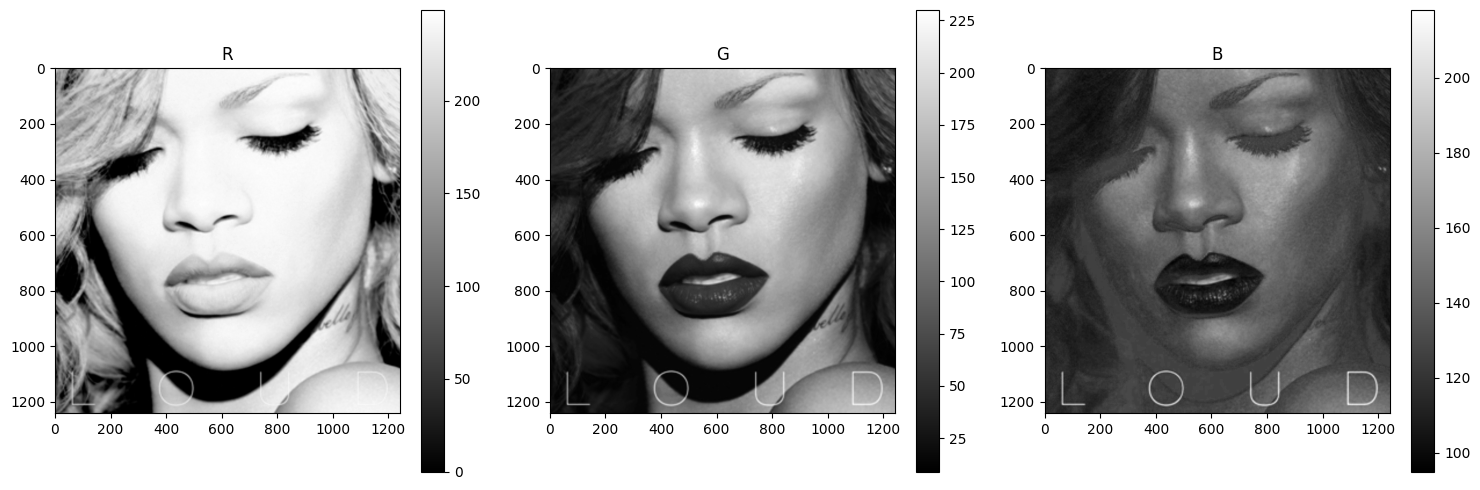

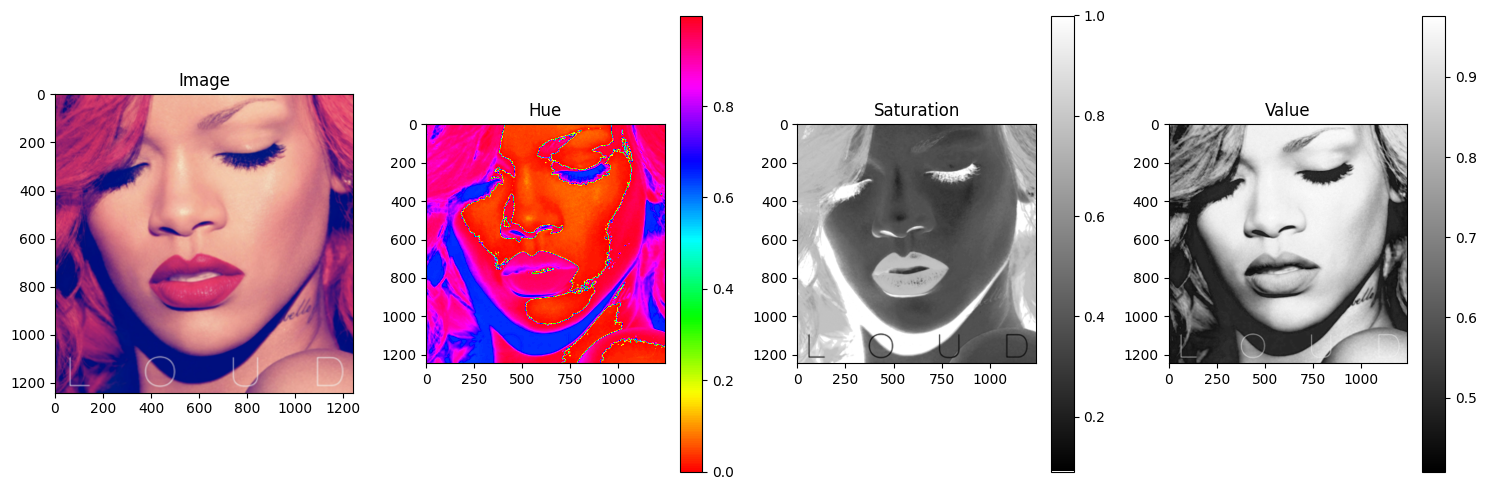

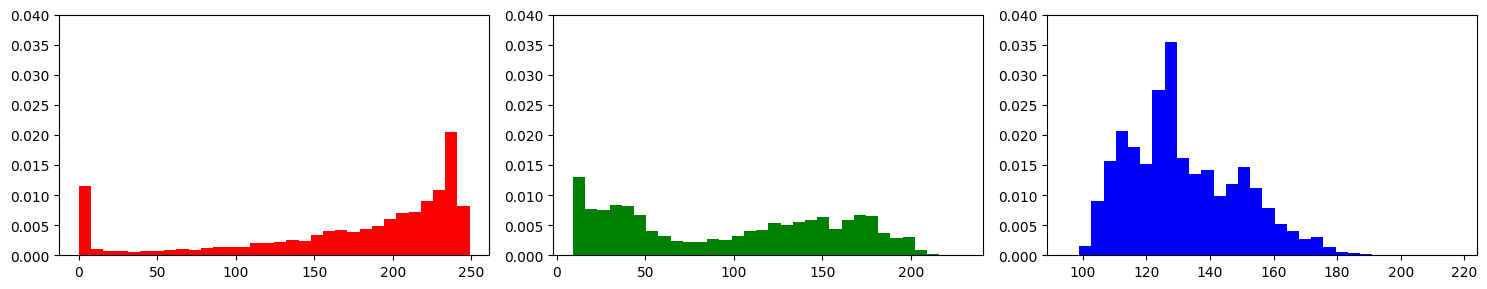

In [4]:
# Visualize the individual color channels (Red, Green, and Blue) of an image
def plot_histograms(image):
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(R, cmap='gray')
    plt.colorbar(orientation='vertical')
    plt.title('R')

    plt.subplot(1, 3, 2)
    plt.imshow(G, cmap='gray')
    plt.title('G')
    plt.colorbar(orientation='vertical')

    plt.subplot(1, 3, 3)
    plt.imshow(B, cmap='gray')
    plt.title('B')
    plt.colorbar(orientation='vertical')

    plt.tight_layout()
    plt.show()

plot_histograms(img)


# HSV Space
def plot_hsv(image):
    hsv_img = rgb2hsv(image[:, :, 0:3])
    H = hsv_img[:, :, 0]
    S = hsv_img[:, :, 1]
    V = hsv_img[:, :, 2]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title('Image')

    plt.subplot(1, 4, 2)
    plt.imshow(H, cmap='hsv')
    plt.colorbar(orientation='vertical')
    plt.title('Hue')

    plt.subplot(1, 4, 3)
    plt.imshow(S, cmap='gray')
    plt.title('Saturation')
    plt.colorbar(orientation='vertical')

    plt.subplot(1, 4, 4)
    plt.imshow(V, cmap='gray')
    plt.title('Value')
    plt.colorbar(orientation='vertical')

    plt.tight_layout()
    plt.show()

plot_hsv(img)


# Histograms in the color distribution in the RGB channels
def plot_histogram(image):
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]

    plt.figure(figsize=(15, 3))

    plt.subplot(1, 3, 1)
    plt.hist(R.ravel(), bins=32, density=True, color='r')
    plt.ylim([0, 0.04])

    plt.subplot(1, 3, 2)
    plt.hist(G.ravel(), bins=32, density=True, color='g')
    plt.ylim([0, 0.04])

    plt.subplot(1, 3, 3)
    plt.hist(B.ravel(), bins=32, density=True, color='b')
    plt.ylim([0, 0.04])

    plt.tight_layout()
    plt.show()

plot_histogram(img)


# Image and Histogram Visualization
def plot_img_and_hist(image):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plot_img_and_hist(image, axes)
    plt.show()


Function that calculates the threshold bounds based on the mean and standard deviation of the input channel. A margin factor of 0.5 is applied to determine the lower and upper bounds, ensuring a balanced range for effective thresholding

In [5]:
def calculate_threshold_bounds(channel):
    mean, std = np.mean(channel), np.std(channel)
    margin = 0.5
    lower_bound = int(max(mean - margin * std, 0))
    upper_bound = int(min(mean + margin * std, 255))
    return lower_bound, upper_bound

# Extract the R, G, and B channels
R, G, B = cv2.split(image)

# Calculate the threshold bounds for each channel
lower_bound_R, upper_bound_R = calculate_threshold_bounds(R)
lower_bound_G, upper_bound_G = calculate_threshold_bounds(G)
lower_bound_B, upper_bound_B = calculate_threshold_bounds(B)

# Print the estimated threshold bounds
print(f"Estimated threshold bounds for Red: [{lower_bound_R}, {upper_bound_R}]")
print(f"Estimated threshold bounds for Green: [{lower_bound_G}, {upper_bound_G}]")
print(f"Estimated threshold bounds for Blue: [{lower_bound_B}, {upper_bound_B}]")

Estimated threshold bounds for Red: [122, 140]
Estimated threshold bounds for Green: [66, 127]
Estimated threshold bounds for Blue: [133, 209]


### Goal 2

In this section, the objective is to implement a quantization algorithm designed to group similar color values and achieve a desired cartoon effect. The function quantize_color takes an image and a set of quantization factors as input, returning a quantized version of the image. The algorithm iterates through the specified quantization ranges, assigning the mean value of pixels within each range to achieve a stylized appearance with reduced color levels. 

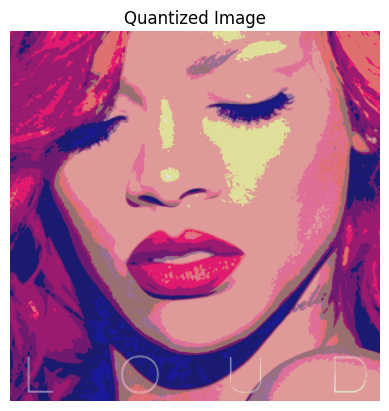

In [6]:
def quantize_color(image, quantization_factors):
    # store the quantized version of the image
    quantized_image = np.zeros_like(image, dtype=np.uint8)

    for i in range(len(quantization_factors) - 1):
        lower_bound = quantization_factors[i]
        upper_bound = quantization_factors[i + 1]

        # Find pixels in the current range and assign the mean value
        mask = (image >= lower_bound) & (image <= upper_bound)
        quantized_image[mask] = int(np.mean(image[mask]))

    return quantized_image

# Example usage
quantization_factors = [0, 64, 128, 192, 255] 
quantized_img = quantize_color(img, quantization_factors)

# Display the quantized image
plt.imshow(quantized_img)
plt.axis('off')
plt.title('Quantized Image')
plt.show()

### Goal 3



In this section, to implement the Gaussian filter, the process commences by converting the image to grayscale. Following this, both 1D and 2D Gaussian filters are formulated. The resulting output is a NumPy array with a data type of uint8. The sigma parameter allows for control over the width of the Gaussian filter, affecting the degree of blur applied to the image. In this case, I chose not to use Fourier transformation due to its propensity for spatial information loss

In [7]:
#Gaussian Filter 
def my_gaussian_filter(img, sigma=0.1):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Construct a 1D Gaussian filter
    t = np.linspace(-10, 10, img.shape[0])
    bump = np.exp(-t**2 / (2. * sigma**2))
    bump /= np.trapz(bump)  # Normalize the integral to 1

    # Construct a 2D Gaussian filter
    gauss = bump[:, np.newaxis] * bump[np.newaxis, :]

    # Filter the image
    filtered_img = cv2.filter2D(gray_img, -1, gauss)

    return filtered_img.astype(np.uint8)

### Goal 4

 Edge Detection Techniques

- auto_threshold_contours:
This method implements edge detection by calculating the gradient along the x and y axes, computing the gradient magnitude, and applying automatic thresholding to create a binary image. The final step involves applying median blur to enhance the prominence of contours, resulting in an image that emphasizes edges.



In [8]:

def auto_threshold_contours(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute the first derivative along the x-axis
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

    # Compute the first derivative along the y-axis
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Compute the magnitude of the gradient
    G = np.sqrt(Ix**2 + Iy**2)
    G = G.astype(np.uint8)  # Convert to CV_8UC1
    
    # Apply automatic thresholding to obtain a binary image
    _, thresholded = cv2.threshold(G, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # Apply median blur to smooth the edges
    smoothed = cv2.medianBlur(thresholded, 5)
    
    return smoothed


- apply_canny_edges:
In this approach, the function begins by converting the image to grayscale, followed by applying Gaussian blur to the grayscale version. Canny edge detection is then employed, revealing edges based on intensity gradients with user-defined thresholds. The resulting canny_edges image provides a representation of detected edges in the original image, offering control over edge sensitivity through threshold 

In [9]:
#Canny Edges
def apply_canny_edges(img, threshold1, threshold2):
    # Convert the image to grayscale
    Img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to the grayscale image
    gaussian_filter = cv2.GaussianBlur(Img_gray, (7, 7), 0)
    
    # Apply Canny edge detection to the blurred image
    canny_edges = cv2.Canny(gaussian_filter, threshold1, threshold2)
    
    return canny_edges


# Function that helpes with tho output of Canny Edge 
def calculate_canny_thresholds(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the mean contrast of the image
    mean_contrast = np.std(gray)

    # Set the recommended threshold values based on the contrast
    threshold1 = int(max(0, mean_contrast - 0.5 * mean_contrast))
    threshold2 = int(min(255, mean_contrast + 0.5 * mean_contrast))

    return threshold1, threshold2

### Goal 5

This section focuses on implementing a feature that empowers users to selectively define and modify color ranges within a cartoon image

- The recolor_image function transforms an image by recoloring it based on quantized color ranges. By computing average colors within defined ranges, this function simplifies the image's color palette, resulting in a stylized, cartoon-like representation.

In [10]:
# Function to recolor an image based on quantized colors
def recolor_image(quantized_image, quantization_factors, original_image):
    recolored_image = np.zeros_like(original_image, dtype=np.uint8)

    for i in range(len(quantization_factors) - 1):
        lower_bound = quantization_factors[i]
        upper_bound = quantization_factors[i + 1]

        # Find pixels in the current range
        mask = (quantized_image >= lower_bound) & (quantized_image <= upper_bound)

        if np.any(mask):
            # Compute the mean only if there are pixels in the range
            average_color = np.mean(original_image[mask], axis=0)
            #assigns the mean color value to the corrisponding pixel
            recolored_image[mask] = average_color.astype(np.uint8)

    return recolored_image

- the color_segmentation function enables users to selectively emphasize specific colors in a cartoon image. It achieves this by creating masks for user-defined color thresholds, allowing for the targeted modification of color components while preserving the overall structure of the image

In [11]:
# Segmentazione colore
def color_segmentation(image, thresholdR, thresholdB, thresholdG):
    R, G, B = cv2.split(image)
    
    maskR = (R > thresholdR).astype(np.uint8)  # Convert to 0 or 1
    maskB = (B > thresholdG).astype(np.uint8)  # Convert to 0 or 1
    maskG = (G > thresholdB).astype(np.uint8)  # Convert to 0 or 1

    mask = np.stack([maskB, maskG, maskR], axis=-1)  # Combine the masks
    result = image * mask  # Apply the masks to the image

    return result

## Experiments

In this experiment, the image underwent color quantization, followed by the application of a Gaussian filter to achieve a smooth effect. Automatic contour detection was then performed to enhance the image's features. Subsequently, contours were identified and drawn on the quantized image. The recolor_image function was applied to stylize the colors, resulting in a captivating cartoon-like representation with emphasized contours

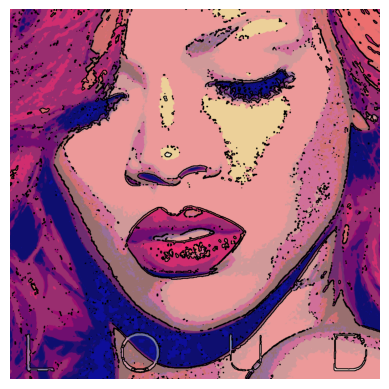

In [12]:
# Color Quantization
quantization_factors = [0, 32, 64, 128, 192, 224, 255]
quantized_image = quantize_color(img, quantization_factors)

# Apply Gaussian Filter
cartoon_image = my_gaussian_filter(quantized_image, sigma=0.1)

# Automatic Contour Detection
contours_image = auto_threshold_contours(quantized_image)

# Find contours in the image
contours, _ = cv2.findContours(contours_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the quantized image
image_with_contours = quantized_image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 0, 0), 2)

# Apply the recolor_image function to the quantized image
recolored_image = recolor_image(quantized_image, quantization_factors, image_with_contours)

# Draw contours on the quantized image
image_with_contours = quantized_image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 0, 0), 2)

plt.imshow(image_with_contours)
plt.axis('off')
plt.show()

It has a cartoon effect with a faithful representation of the original image. The contours with auto_threshold are highly detailed, it also captures the color changes due to lighting .

In this experiment, we optimize Canny edge detection using predefined thresholds. We apply color quantization and a Gaussian filter to enhance the image. Automatic contour detection follows, with identified contours visualized on the quantized image. The recolor_image function adds a creative touch, resulting in a visually transformed output showcasing contours and unique recoloring effects.

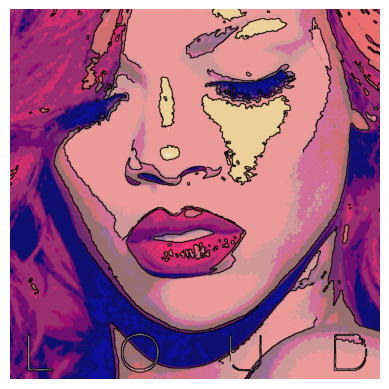

In [13]:
#Calculated canny thresholds
threshold1, threshold2 = calculate_canny_thresholds(image)

# Color Quantization
quantization_factors = [0, 32, 64, 128, 192, 224, 255]
quantized_image = quantize_color(img, quantization_factors)

# Apply Gaussian Filter
cartoon_image = my_gaussian_filter(quantized_image, sigma=0.1)

# Automatic Contour Detection
contours_image = apply_canny_edges(quantized_image, threshold1, threshold2)

# Find contours in the image
contours, _ = cv2.findContours(contours_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the quantized image
image_with_contours = quantized_image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 0, 0), 2)

# Apply the recolor_image function to the quantized image
recolored_image = recolor_image(quantized_image, quantization_factors, image_with_contours)

plt.imshow(image_with_contours)
plt.axis('off')
plt.show()

It has a cartoon effect with a faithful representation of the original image. The contours with canny are highly detailed, it also captures the color changes due to lighting, but less than auto_threshold.

In this experiment, we initiate color quantization using predefined factors, producing a quantized image. Automatic contour detection follows, enhancing the image contours. Next, we apply a Gaussian filter to refine the image. Identifiable contours are then drawn on the quantized image. To further manipulate the image, the color_segmentation function is applied, isolating specific color ranges and modifying the image accordingly. The final output showcases the quantized image with emphasized contours and color segmentation effects

In [14]:
# Color quantization
quantization_factors = [0, 32, 64, 128, 192, 224, 255]
quantized_image = quantize_color(image, quantization_factors)

# Automatic contour detection
contours_image = auto_threshold_contours(quantized_image)

# Apply the Gaussian filter
cartoon_image = my_gaussian_filter(quantized_image, sigma=0.1)

# Find contours in the image
contours, _ = cv2.findContours(contours_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the quantized image
image_with_contours = quantized_image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 0, 0), 2)

@interact(red=IntSlider(min=0, max=255, description='red '),
          green=IntSlider(min=0, max=255, description='green'),
          blu=IntSlider(min=0, max=255, description='blu'))

def color_segmentation_widget(red, green, blu):
    # Apply the color_segmentation function to the image with contours
    result_image = color_segmentation(image_with_contours, red, green, blu)

    # Display the resulting image
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='red ', max=255), IntSlider(value=0, description='green',…

The image is inherently very red and blue, as observed with calculate_threshold_bounds. Knowing that pink has RGB values (255, 105, 180), we have chosen the thresholds (101, 116, 10) to turn the image into a realistic pink shade. 

### Scenario 2: Quantization followed by Gaussian Filter

In this experiment, a Gaussian filter is applied to the original image, followed by color quantization using predefined factors. Automatic contour detection is performed on the resulting image. An interactive widget allows you to experiment with color segmentation parameters. The output showcases the image with applied contours and color segmentation, offering insights into the impact of the Gaussian filter and quantization on the visual representation.

In [15]:
# Apply the Gaussian filter
gaussian_filtered_image = my_gaussian_filter(image, sigma=0.1)

# Convert the filtered image to a three-channel (color) image
gaussian_filtered_image_color = cv2.merge([gaussian_filtered_image] * 3)

# Color quantization
quantization_factors = [0, 32, 64, 128, 192, 224, 255]
quantized_image = quantize_color(gaussian_filtered_image_color, quantization_factors)

# Automatic contour detection
contours_image = auto_threshold_contours(gaussian_filtered_image_color)

# Find contours in the image
contours, _ = cv2.findContours(contours_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

@interact(red=IntSlider(min=0, max=255, description='red '),
          green=IntSlider(min=0, max=255, description='green'),
          blu=IntSlider(min=0, max=255, description='blu'))
def color_segmentation_widget(red, green, blu):
    # Apply the color_segmentation function to the image with contours
    result_image = color_segmentation(quantized_image, red, green, blu)

    # Draw contours on the resulting image
    image_with_contours = result_image.copy()
    cv2.drawContours(image_with_contours, contours, -1, (0, 0, 0), 2)

    # Display the resulting image
    plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='red ', max=255), IntSlider(value=0, description='green',…

The image exhibits a predominant red and blue tone, as identified through the calculate_threshold_bounds analysis. Considering the RGB values of pink (255, 105, 180), we opted for the thresholds (60, 201, 10) to achieve the pink effect. It's worth noting that the auto thresholding method may occasionally capture edges somewhat out of border, not always achieving optimal results.

#### Canny Edge

The Gaussian filter is applied, and the filtered image is converted into a three-channel (colored) image. Color quantization is performed on the filtered color image using predefined factors. Subsequently, color segmentation is applied with predetermined threshold values. An interactive widget is used to experiment with Canny edge detection on the segmented image. The output illustrates the impact of the Gaussian filter, quantization, and color segmentation on the visual representation, particularly emphasizing Canny edges and contours

In [16]:
# Apply the Gaussian filter
gaussian_filtered_image = my_gaussian_filter(image, sigma=0.1)

# Convert the filtered image to a three-channel (color) image
gaussian_filtered_image_color = cv2.merge([gaussian_filtered_image] * 3)

# Color quantization
quantization_factors = [0, 32, 64, 128, 192, 224, 255]
quantized_image = quantize_color(gaussian_filtered_image_color, quantization_factors)

# Apply color segmentation
# Values assigned earlier to make the image pink
# Rihanna
segmented_image = color_segmentation(quantized_image, 60, 201, 10)
# Britney
#segmented_image = color_segmentation(quantized_image, 45, 255, 87)
# Lana
#segmented_image = color_segmentation(quantized_image, 130, 255, 131)


# Apply Canny edges
threshold1_slider = IntSlider(min=0, max=255, description='Threshold 1')
threshold2_slider = IntSlider(min=0, max=255, description='Threshold 2')

# Function to display Canny edges on the segmented image
def update_canny(threshold1, threshold2):
    canny_edges = apply_canny_edges(segmented_image, threshold1, threshold2)

    # Find contours in the segmented image
    contours, _ = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the segmented image
    image_with_contours = segmented_image.copy()
    cv2.drawContours(image_with_contours, contours, -1, (0, 0, 0), 5)

    # Display the resulting image
    plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    plt.title('Canny Edges and Contours')
    plt.axis('off')
    plt.show()

# Interactive slider to select threshold values
interact(update_canny, threshold1=threshold1_slider, threshold2=threshold2_slider)

thd1, thd2 = calculate_canny_thresholds(image)
print("Estimated Threshold 1:", thd1)
print("Estimated Threshold 2:", thd2)
    


interactive(children=(IntSlider(value=0, description='Threshold 1', max=255), IntSlider(value=0, description='…

Estimated Threshold 1: 28
Estimated Threshold 2: 86


Here, I used the previously determined thresholds (60,201,10) and found that Canny is effective. The edge detection function is quite accurate, although it presented some challenges with Britney (another picture that I used while I was doing my experiments). This might be attributed to the inherent complexity of the image, featuring a relatively low contrast variation of the same color (blue)

## Conclusion

In this project, our main goal was to create two different cartoon-style visual approaches for album covers. We explored two scenarios, each with its own goals and methods.

##### Scenario 1: Quantization followed by Gaussian Filter
The initial focus was on achieving a realistic cartoon effect. We delved into color distribution analysis, implemented a quantization algorithm, and applied a Gaussian filter for smoothing. The aim was to enhance the cartoon appearance while preserving the original color fidelity. Additionally, users had the option to modify specific colors in the cartoon image, striking a balance between authenticity and customization.

##### Scenario 2: Gaussian Filter followed by Quantization
Here, we started with image smoothing using a Gaussian filter, followed by quantization. The intention was to create a 'painterly' and 'flat' cartoon effect, ultimately leading to a 'monochromatic pink' appearance. Importantly, this process allowed for customization, enabling a shift to a 'monochromatic blue' or other variations, adding a layer of flexibility.

Our approach involved various methodologies such as histogram analysis, quantization algorithms, Gaussian filtering, and edge detection techniques. We meticulously applied these methods to the original image, observing the impact of each step and documenting the results.

Challenges surfaced, especially in handling color variations during Gaussian filtering. While we initially considered Fourier transformation, concerns about spatial information loss led us to reconsider. This prompted us to reorganize the steps in Scenario 2 to achieve a specific visual style.

To enhance user experience, we introduced interactive features using widgets. Users could explore and modify parameters like color segmentation thresholds, allowing for personalized adjustments and artistic expression.

The outcomes aligned with our project goals, providing cartoonized images with distinct styles. The scenarios offered flexibility, letting users choose between realistic cartoon effects or more painterly appearances. We reflected on the impact of Gaussian filtering, quantization, and edge detection, gaining insights from the experiments.

In summary, our project aimed to explore techniques for creating engaging cartoon-style album covers.